In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:

from scipy.stats import rv_continuous
from scipy.interpolate import interp1d
from matplotlib.patches import Circle
from scipy.special import gamma
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from numpy import exp, sqrt
from scipy.integrate import quad, dblquad, nquad
import matplotlib.patches as patches
from itertools import product
from scipy.integrate import quad
import scipy.optimize as optimize
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.neighbors import KDTree
import sys
import lmfit
#from py_unsio import *
import os
import wkbl
from wkbl.astro.halo_info import *
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import wkbl.astro.nbody_essentials as nbe
import cfalcon
CF =cfalcon.CFalcon()
import iminuit
from iminuit import Minuit, describe, Struct
from matplotlib.colors import LogNorm
from matplotlib.ticker import FormatStrFormatter
import warnings
warnings.filterwarnings('ignore')

from astropy.cosmology import FlatLambdaCDM, LambdaCDM,z_at_value, Planck15
import astropy.units as u
cosmo =LambdaCDM(H0=69, Om0=0.286, Ode0=0.7)

In [3]:
def r_SFR(path):
    files = open(path)
    t = sfr = np.array([])
    for l in files:
        row = l.split(',')
        if row[0][0]=="#":continue
        t = np.append(t, float(row[0]))
        sfr = np.append(sfr, float(row[1]))
    return t, sfr
del_SF0 = r_SFR("../../datafiles/SFR/Mo_DEL_SF0_poly.txt")


In [4]:
del_SF0_HR = r_SFR("../../datafiles/SFR/Mo_DEL_SF0_poly.txt")
del_SF0 = r_SFR("../../datafiles/SFR/SF0_del_poly.txt")
del_SF1_dp = r_SFR("../../datafiles/SFR/SF1_del_poly.txt")
del_SF1_di = r_SFR("../../datafiles/SFR/Mo_SF1_Del_Iso.txt")
del_SF1_mi = r_SFR("../../datafiles/SFR/Mo_SF1_Mec_Iso.txt")
del_SF1_dp_hr = r_SFR("../../datafiles/SFR/SF1_pol.txt")
del_SF1_dp =r_SFR("../../datafiles/SFR/Mo_SF1_Del_pol.txt")
del_SF1_mp =r_SFR("../../datafiles/SFR/Mo_SF1_Mec_pol.txt")
levelmax17 =r_SFR("../../datafiles/SFR/levelmax17.txt")
levelmax19 =r_SFR("../../datafiles/SFR/levelmax19.txt")
levelmax20 =r_SFR("../../datafiles/SFR/levelmax20.txt")
HR_SF0_M_I=r_SFR("../../datafiles/SFR/Mo_del_pol.txt")
HR_SF1_M_I=r_SFR("../../datafiles/SFR/Mo_Mec_ISO_SF1.txt")






In [5]:
fig,ax = plt.subplots()
#ax.set_ylim([0,35])
ax.set_ylabel("SFR [Msun/year]", fontsize=18)
ax.set_xlabel("lookback time [Gyr]", fontsize=18)
axu = ax.twiny()
ma = (-del_SF0[0]).max()
ax.set_xlim(10,13.52)
axu.set_xlim(10,13.52)

axu.set_xticks([ma-cosmo.age(10).value,ma-cosmo.age(5).value,
                ma-cosmo.age(4).value,ma-cosmo.age(3).value,ma-cosmo.age(2).value]
              )
axu.set_xticklabels(["10","5","4","3","2"])



ax.plot(-del_SF0_HR[0],np.log10(del_SF0_HR[1]/(np.abs(del_SF0_HR[0][1]-del_SF0_HR[0][0])*1e9)),lw=2,label= "SF0 ")
ax.plot(-HR_SF0_M_I[0]+HR_SF0_M_I[0].min()+13.52,
        np.log10(HR_SF0_M_I[1]/(np.abs(HR_SF0_M_I[0][1]-HR_SF0_M_I[0][0])*1e9)),lw=2,label="SF0 mechanical")
ax.plot(-HR_SF1_M_I[0]+HR_SF1_M_I[0].min()+13.52,np.log10(HR_SF1_M_I[1]/(np.abs(HR_SF1_M_I[0][1]-HR_SF1_M_I[0][0])*1e9)),'r',lw=2,label="SF1 mechanical")

#ax.plot(-levelmax20[0]+levelmax20[0].min()+13.52,np.log10(levelmax20[1]/(np.abs(levelmax20[0][1]-levelmax20[0][0])*1e9)),'k',lw=2,label="SF1 mechanical 37 pc")
leg = ax.legend(loc='lower left', ncol=1, shadow=False, fontsize=15)
leg.get_frame().set_linewidth(0.0)

<IPython.core.display.Javascript object>

In [6]:
[ma-cosmo.age(10).value,ma-cosmo.age(5).value,
                ma-cosmo.age(4).value,ma-cosmo.age(3).value,ma-cosmo.age(2).value]

[13.03838097944824,
 12.324986864395997,
 11.9514261597567,
 11.33531485199073,
 10.187023625538696]

<IPython.core.display.Javascript object>


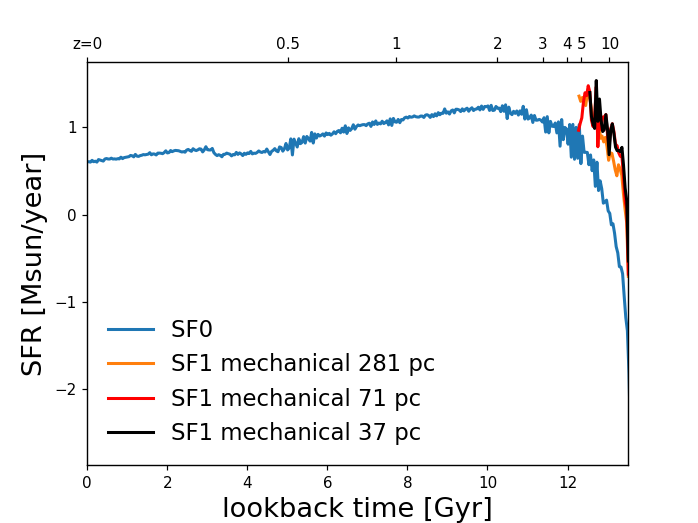

In [7]:
fig,ax = plt.subplots()
#ax.set_ylim([0,35])
ax.set_ylabel("SFR [Msun/year]", fontsize=18)
ax.set_xlabel("lookback time [Gyr]", fontsize=18)
axu = ax.twiny()
ma = (-del_SF0[0]).max()
ax.set_xlim(0,13.52)
axu.set_xlim(0,13.52)

axu.set_xticks([ma-cosmo.age(10).value,ma-cosmo.age(5).value,
                ma-cosmo.age(4).value,ma-cosmo.age(3).value,ma-cosmo.age(2).value,
                ma-cosmo.age(1).value,ma-cosmo.age(0.5).value,ma-cosmo.age(0).value]
              )
axu.set_xticklabels(["10","5","4","3","2","1","0.5","z=0"])



ax.plot(-del_SF0_HR[0],np.log10(del_SF0_HR[1]/(np.abs(del_SF0_HR[0][1]-del_SF0_HR[0][0])*1e9)),lw=2,label= "SF0 ")
ax.plot(-levelmax17[0]+levelmax17[0].min()+13.52,
        np.log10(levelmax17[1]/(np.abs(levelmax17[0][1]-levelmax17[0][0])*1e9)),lw=2,label="SF1 mechanical 281 pc")
ax.plot(-levelmax19[0]+levelmax19[0].min()+13.52,np.log10(levelmax19[1]/(np.abs(levelmax19[0][1]-levelmax19[0][0])*1e9)),'r',lw=2,label="SF1 mechanical 71 pc")

ax.plot(-levelmax20[0]+levelmax20[0].min()+13.52,np.log10(levelmax20[1]/(np.abs(levelmax20[0][1]-levelmax20[0][0])*1e9)),'k',lw=2,label="SF1 mechanical 37 pc")
leg = ax.legend(loc='lower left', ncol=1, shadow=False, fontsize=15)
leg.get_frame().set_linewidth(0.0)

In [8]:
fig,ax = plt.subplots()
#ax.set_ylim([0,35])
ax.set_ylabel("SFR [Msun/year]", fontsize=18)
ax.set_xlabel("lookback time [Gyr]", fontsize=18)



ax.plot(-del_SF0[0],np.log10(del_SF0[1]/(np.abs(del_SF0[0][1]-del_SF0[0][0])*1e9)))
ax.plot(-del_SF1_dp[0],np.log10(del_SF1_dp[1]/(np.abs(del_SF1_dp[0][1]-del_SF1_dp[0][0])*1e9)),"k")
ax.plot(-del_SF1_mp[0]+del_SF1_mp[0][0]-del_SF1_dp[0][0],np.log10(del_SF1_mp[1]/(np.abs(del_SF1_mp[0][1]-del_SF1_mp[0][0])*1e9)),"k")

ax.plot(-del_SF1_di[0],np.log10(del_SF1_di[1]/(np.abs(del_SF1_di[0][1]-del_SF1_di[0][0])*1e9)))
ax.plot(-del_SF1_mi[0],np.log10(del_SF1_mi[1]/(np.abs(del_SF1_mi[0][1]-del_SF1_mi[0][0])*1e9)),"m")
ax.plot(- del_SF1_dp_hr [0],np.log10(del_SF1_dp_hr[1]/(np.abs(del_SF1_dp_hr[0][1]-del_SF1_dp_hr[0][0])*1e9)),"r")
#ax.plot(-del_SF1_di_hr[0]-del_SF1_di[0].min()+del_SF1_di_hr[0].min(),del_SF1_di_hr[1]/1e8)



<IPython.core.display.Javascript object>

In [9]:
sf0 = np.log10(del_SF0[1])
print sf0[-3:]
sf0 = sf0[::-1]
print sf0[:3]
sf0 = np.cumsum(sf0)
print sf0[:3]
#print del_SF1_di[0][1:]-del_SF1_di[0][:-1]


[8.1790139  8.20960169 8.20231081]
[8.20231081 8.20960169 8.1790139 ]
[ 8.20231081 16.41191251 24.59092641]


In [10]:
# Moster et all
def M_1(z):
    M10 ,M11 = 11.590, 1.195
    log = M10 + M11*(z / (z+1))
    return 10**(log)

def N(z):
    N10 ,N11 = 0.0351, -0.0247
    return N10 + N11*(z / (z+1))


def beta(z):
    B10 ,B11 = 1.376, -0.826
    return B10 + B11*(z / (z+1))


def gamma(z):
    G10 ,G11 = 0.608, 0.329
    return G10 + G11*(z / (z+1))

def mm(M,z):
    one = ( M / M_1(z))**(-beta(z))
    two = ( M / M_1(z))**gamma(z)
    return 2*N(z) * M / (one +two)

def alpha(m):
    return 0.15 / np.log10(m)

In [27]:
moster = np.vectorize(mm)
halo_mass = np.array([9.58371512e+10, 1.45370808e+11, 2.63523156e+11,
                      3.49378642e+11, 3.75248519e+11, 4.70064595e+11,
                      5.16890591e+11, 6.20532597e+11, 6.94057107e+11,
                      7.98261445e+11])
halo_Z = np.array([  3.16, 2.57, 2.05, 1.597, 1.22, 0.8956, 0.6128,
                     0.37449,0.1729, 0])


halo_Z = np.array([ 6.84310662,  6.40728296,  5.55716124,  5.1536987,   4.79708475,  4.47929606,
                    4.12816768,  3.81918637,  3.5453628,   3.30102917,  3.04029874,  2.84614442,
                    2.63631578,  2.41880027,  2.19995319,  2.05339671,  1.85708343,  1.70266235,
                    1.54776472])
halo_mass =  np.array([1.42578576e+08, 9.32993760e+07, 2.77365952e+08, 6.42772320e+07,
                       1.77151949e+09, 2.38624358e+09, 4.29936742e+09, 6.09640294e+09,
                       1.08593459e+10, 1.31943619e+10, 2.06458450e+10, 2.51590820e+10,
                       2.78371041e+10, 3.82628700e+10, 6.24916890e+10, 6.59480576e+10,
                       8.71318651e+10, 1.08940665e+11, 1.27354929e+11])

halo_Z =  np.array([10.763,8.9995,6.84310662, 6.40728296, 5.89644175, 5.55716124, 5.1536987, 4.79708475,
                    4.47929606, 4.12816768, 3.81918637, 3.5453628,  3.30102917, 3.04029874,
                    2.84614442, 2.63631578, 2.41880027, 2.19995319, 2.05339671, 1.85708343,
                    1.70266235, 1.54776472])

halo_mass = np.array([2.1369257e+09,2.7625574e+09,7.79721728e+09, 8.31649997e+09, 1.13451254e+10, 2.33135452e+10,
                      3.58041682e+10, 5.19260692e+10, 6.50168074e+10, 6.39281848e+10,
                      6.70803026e+10, 7.26630646e+10, 8.00227901e+10, 1.01492113e+11,
                      1.26924792e+11, 1.40086198e+11, 1.44961946e+11, 2.08543023e+11, 
                      2.16095425e+11, 2.92072063e+11, 3.21078034e+11, 3.28609563e+11])


In [28]:
print "{0:.3e}".format(moster(6.734e11,1.8))
moster_points = moster(halo_mass,halo_Z)
ma- cosmo.age(halo_Z).value

8.161e+09


array([13.08458275, 12.96417317, 12.7197233 , 12.64813661, 12.54966046,
       12.47356694, 12.36931799, 12.26196331, 12.15150521, 12.00946706,
       11.86301988, 11.71244903, 11.55794575, 11.36747754, 11.20491623,
       11.0052112 , 10.76645556, 10.48627613, 10.27150815,  9.94238761,
        9.64354885,  9.30100769])

In [29]:
halo_age = np.array([11.45854754, 10.93613748, 10.26623832,  9.41501781,  8.39299245,  7.14622191,
  5.62699549,  3.8769219, 1.91300462, 0. ])
print ma-cosmo.age(halo_Z).value


[13.08458275 12.96417317 12.7197233  12.64813661 12.54966046 12.47356694
 12.36931799 12.26196331 12.15150521 12.00946706 11.86301988 11.71244903
 11.55794575 11.36747754 11.20491623 11.0052112  10.76645556 10.48627613
 10.27150815  9.94238761  9.64354885  9.30100769]


In [30]:
fig,[ax,ax1] = plt.subplots(1,2,figsize=[15,6])
#ax.set_ylim([7.5,11.4])
#ax.set_xlim(0,13.52)
ax1.set_xlim(0,13.52)
ax.plot(ma- cosmo.age(halo_Z).value,np.log10(halo_mass))

ma = (-del_SF0[0]).max()

axu = ax.twiny()
axu.set_xlim(0,13.52)
axu.set_xticks([ma-cosmo.age(10).value,ma-cosmo.age(5).value,
                ma-cosmo.age(4).value,ma-cosmo.age(3).value,ma-cosmo.age(2).value,
                ma-cosmo.age(1).value,ma-cosmo.age(0.5).value,ma-cosmo.age(0).value]
              )
axu.set_xticklabels(["10","5","4","3","2","1","0.5","z=0"])

axu1 = ax1.twiny()
axu1.set_xlim(0,13.52)
axu1.set_xticks([ma-cosmo.age(10).value,ma-cosmo.age(5).value,
                ma-cosmo.age(4).value,ma-cosmo.age(3).value,ma-cosmo.age(2).value,
                ma-cosmo.age(1).value,ma-cosmo.age(0.5).value,ma-cosmo.age(0).value]
              )
axu1.set_xticklabels(["10","5","4","3","2","1","0.5","z=0"])
ax.set_ylabel(r"$\rm Log(M_{\star}[M_{\odot}])$", fontsize=18)
ax.set_xlabel(r"$\rmlookback\,\, time \,[Gyr]$", fontsize=18)
ax.axhline(y=np.log10(5e10),color="k",linestyle="--")
sf0 = np.cumsum(del_SF0[1][::-1])
sf1_di = np.cumsum(del_SF1_di[1][::-1])
sf1_mi = np.cumsum(del_SF1_mi[1][::-1])
sf1_mi = np.cumsum(del_SF1_mi[1][::-1])


ax.plot(-del_SF0[0],np.log10(sf0),"b",lw=1.5, label=r"$\rm SF0-delayed\,\,cooling$")
ax.plot(-del_SF1_di[0],np.log10(sf1_di),"g",lw=1.5, label=r"$\rmSF1-delayed\,\, cooling$")
ax.plot(-del_SF1_mi[0],np.log10(sf1_mi), "r",lw=1.5, label=r"$\rmSF1-mechanical\,\, feedback$")
ax.errorbar(ma-cosmo.age(halo_Z).value,np.log10(moster_points),yerr=1/np.sqrt(np.log10(moster_points)),
            c='k',alpha=0.7,label=r"$\rm Moster\,\, et\, al.$"
           )
leg = ax.legend(loc='lower left', ncol=1, shadow=False, fontsize=15)
leg.get_frame().set_linewidth(0.0)
ax1.set_ylabel(r"$\rm log(SFR\,[Msun/year])$", fontsize=18)
ax1.set_xlabel(r"$\rm lookback\,\,time\, [Gyr]$", fontsize=18)


ax.fill_between(ma-cosmo.age(halo_Z).value,
                np.log10(moster_points)+1/np.sqrt(np.log10(moster_points)),
                np.log10(moster_points)-1/np.sqrt(np.log10(moster_points)),
                color='gray',alpha=0.5
               )


ax1.plot(-del_SF0[0],np.log10(del_SF0[1]/(np.abs(del_SF0[0][1]-del_SF0[0][0])*1e9)),
         "b",lw=1.5)
ax1.plot(-del_SF1_di[0],np.log10(del_SF1_di[1]/(np.abs(del_SF1_di[0][1]-del_SF1_di[0][0])*1e9)),
         "g",lw=1.5)
ax1.plot(-del_SF1_mi[0],np.log10(del_SF1_mi[1]/(np.abs(del_SF1_mi[0][1]-del_SF1_mi[0][0])*1e9)),
         "r",lw=1.5)

<IPython.core.display.Javascript object>

In [15]:
ma = 13.704
ma-cosmo.age(8).value

13.051153938777988

In [16]:
[ma-cosmo.age(10).value,ma-cosmo.age(5).value,
                ma-cosmo.age(4).value,ma-cosmo.age(3).value,ma-cosmo.age(2).value,
                ma-cosmo.age(1).value,ma-cosmo.age(0.5).value,ma-cosmo.age(0).value]

[13.22058189194824,
 12.507187776895998,
 12.1336270722567,
 11.517515764490732,
 10.369224538038697,
 7.77734621546482,
 5.045514853712069,
 -0.07804939085295537]

most favorable IMF
tdelay 
eps_star
